# Análise descritiva dos dados (EDA)
Análise descritiva extraindo conhecimento das variáveis e apresentando insights obtidos a partir delas.

- Apresentação do caminho usado para selecionar graficamente as variáveis mais ou menos importantes para cada problema, como elas se relacionam e porquê;
- Como o caminho escolhido na EDA suporta a escolha do modelo escolhido em cada problema;
- Descrição das outras técnicas que poderiam ser aplicadas e porquê não foram escolhidas;
- Arquivos dos dados utilizados: receitas.json

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Leitura dos dados
receitas = pd.read_json(r'C:\Users\laila\Documents\eda-oncase\receitas.json')
receitas

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0
...,...,...,...,...,...,...,...,...,...,...,...
20125,[Beat whites in a bowl with an electric mixer ...,2.0,2004-08-20 04:00:00+00:00,"[Mixer, Cheese, Egg, Fry, Cocktail Party, Parm...",28.0,None,2.0,3.125,Parmesan Puffs,"[2 large egg whites, 3 oz Parmigiano-Reggiano,...",64.0
20126,[Bring broth to simmer in saucepan.Remove from...,28.0,2008-02-28 22:06:54+00:00,"[Side, Kid-Friendly, High Fiber, Dinner, Parme...",671.0,Cooking the artichokes with the rice infuses t...,22.0,4.375,Artichoke and Parmesan Risotto,"[5 1/2 cups (or more) low-salt chicken broth, ...",583.0
20127,"[Using a sharp knife, cut a shallow X in botto...",38.0,2005-10-21 18:21:20+00:00,"[Onion, Poultry, turkey, Vegetable, Bake, Kid-...",563.0,None,31.0,4.375,Turkey Cream Puff Pie,"[1 small tomato, 1 small onion, finely chopped...",652.0
20128,[Heat 2 tablespoons oil in heavy medium skille...,24.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Citrus, Dairy, Fish, Garlic, Past...",631.0,"Sharon Hooykaas of Los Alamitos, California, w...",45.0,4.375,Snapper on Angel Hair with Citrus Cream,"[4 tablespoons olive oil, 4 shallots, thinly s...",517.0


In [3]:
# Ajustes no dataset

# 1 - Separando colunas para data e horário

time = []
date = []

for row in receitas['date']:
    date.append(datetime.date(row))
    time.append(datetime.time(row))
    
receitas['date'] = date
receitas['time'] = time

# 2 - Reorganizando as colunas

info_cols = ['title', 'categories', 'desc', 'ingredients', 'directions']
nutri_cols = ['fat', 'calories', 'protein', 'sodium']
date_time_rating_cols = ['date', 'time', 'rating']
new_order = info_cols + nutri_cols + date_time_rating_cols

receitas = receitas[new_order]

# 3 - Substituindo valores NaN das informações nutricionais por 0

for nutri in nutri_cols:
    receitas[nutri] = receitas[nutri].fillna(0)

receitas.head()

,title,categories,desc,ingredients,directions,fat,calories,protein,sodium,date,time,rating
0,"Lentil, Apple, and Turkey Wrap","[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",None,"[4 cups low-sodium vegetable or chicken stock,...","[1. Place the stock, lentils, celery, carrot, ...",7.0,426.0,30.0,559.0,2006-09-01,04:00:00,2.500
1,Boudin Blanc Terrine with Red Onion Confit,"[Food Processor, Onion, Pork, Bake, Bastille D...",This uses the same ingredients found in boudin...,"[1 1/2 cups whipping cream, 2 medium onions, c...",[Combine first 9 ingredients in heavy medium s...,23.0,403.0,18.0,1439.0,2004-08-20,04:00:00,4.375
2,Potato and Fennel Soup Hodge,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",None,"[1 fennel bulb (sometimes called anise), stalk...",[In a large heavy saucepan cook diced fennel a...,7.0,165.0,6.0,165.0,2004-08-20,04:00:00,3.750
3,Mahi-Mahi in Tomato Olive Sauce,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",The Sicilian-style tomato sauce has tons of Me...,"[2 tablespoons extra-virgin olive oil, 1 cup c...",[Heat oil in heavy large skillet over medium-h...,0.0,0.0,0.0,0.0,2009-03-27,04:00:00,5.000
4,Spinach Noodle Casserole,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",None,"[1 12-ounce package frozen spinach soufflé, th...",[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,547.0,20.0,452.0,2004-08-20,04:00:00,3.125


In [4]:
# Análise estatística dos valores nutricionais e das avaliações das receitas

receitas.describe()

,fat,calories,protein,sodium,rating
count,2.013000e+04,2.013000e+04,20130.000000,2.013000e+04,20100.000000
mean,2.735081e+02,5.006176e+03,79.088077,4.929065e+03,3.713060
std,1.816294e+04,3.194592e+05,3412.207945,2.965506e+05,1.343144
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000e+00,6.700000e+01,0.000000,6.000000e+00,3.750000
50%,1.200000e+01,2.570000e+02,5.000000,1.630000e+02,4.375000
75%,2.800000e+01,5.020000e+02,19.000000,5.700000e+02,4.375000
max,1.722763e+06,3.011122e+07,236489.000000,2.767511e+07,5.000000


**Nota 1**: Após o tratamento realizado nos dados e observando a variação dos conteúdos de cada coluna pode-se definir como referência para as receitas as suas avaliações (rating) uma vez que são valores que variam pouco e são mais fáceis de dividir os dados para análise.

In [76]:
# Identificando todos os valores de rating

ratings = list(np.sort(receitas.rating.unique()))
ratings

[0.0, 1.25, 1.875, 2.5, 3.125, 3.75, 4.375, 5.0, nan]

In [93]:
# Contagem de receitas por avaliação (rating)

count_rating = receitas['rating'].value_counts(dropna=False)
count_rating

4.375    8033
3.750    5174
5.000    2731
0.000    1849
3.125    1489
2.500     536
1.250     164
1.875     124
NaN        30
Name: rating, dtype: int64

Número de receitas sem avaliação: 30


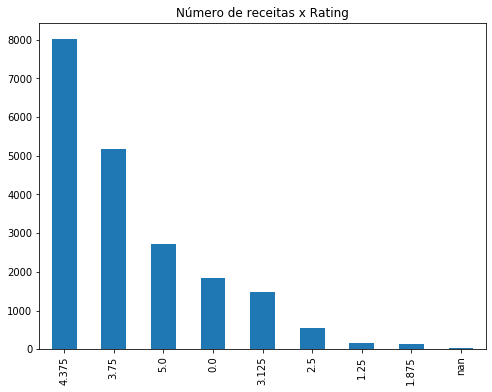

In [94]:
# Gráfico de barras representativo da contagem

count_rating.plot(kind='bar',figsize=(8,6))
plt.title("Número de receitas x Rating")
print(f'Número de receitas sem avaliação: {count_rating.iloc[-1]}')

Text(0.5, 1.0, 'Sodium x Rating')

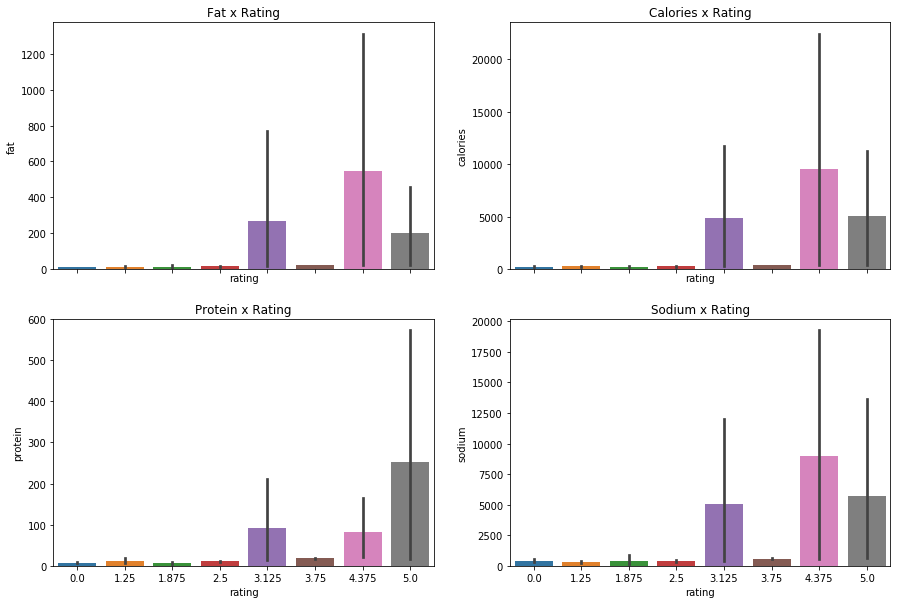

In [95]:
# Gráfico de barras de informações nutricionais x avaliação (rating)

f, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
sns.barplot(x="rating", y="fat", data=receitas, ax=axes[0,0]).set_title("Fat x Rating")
sns.barplot(x="rating", y="calories", data=receitas, ax=axes[0,1]).set_title("Calories x Rating")
sns.barplot(x="rating", y="protein", data=receitas, ax=axes[1,0]).set_title("Protein x Rating")
sns.barplot(x="rating", y="sodium", data=receitas, ax=axes[1,1]).set_title("Sodium x Rating")

**Nota 2**: Nos gráficos é possível notar uma tendência nas avaliações das receitas: as que apresentam melhores avaliações (ratings de 4.375 e 5.0) são as mais gordurosas, calóricas e com alto teor de sal. Nota-se também que as receitas com rating 5.0 são as mais protéicas.

Text(0.5, 1.0, 'Sodium x Calories')

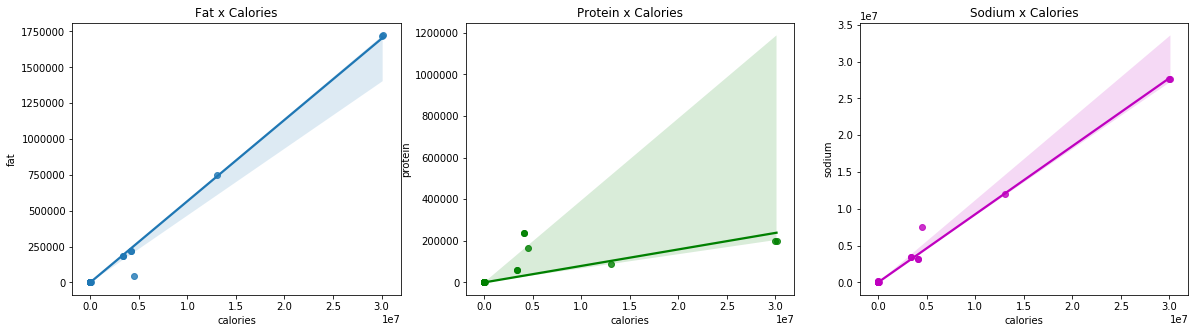

In [133]:
# Gráfico de dispersão para avaliar relações entre as informações nutricionais

f, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
sns.regplot(x="calories", y="fat", data=receitas, ax=axes[0]).set_title("Fat x Calories")
sns.regplot(x="calories", y="protein", data=receitas, ax=axes[1], color='g').set_title("Protein x Calories")
sns.regplot(x="calories", y="sodium", data=receitas, ax=axes[2], color='m').set_title("Sodium x Calories")

**Nota 3**: Nos gráficos pode ser visto que na maioria das receitas os valores de gordura e sal estão diretamente relacionados aos de calorias, mas o mesmo não acontece com a proteína que muitas vezes pode ser alta, mas com baixa caloria. 